In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./iFlowDatos.csv')

In [5]:
df.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000


In [6]:
df.isna().sum()

iddomicilioorden            0
direccion                   0
localidad                   0
InicioHorario1              0
FinHorario1                 0
latitud                    41
longitud                   41
cliente                     0
mes                         0
Bultos                      0
Peso                        0
Unidades                    0
InicioVisitaPlanificado     0
FinVisitaPlanificado        0
InicioVisitaReal           52
FinVisitaReal              52
dtype: int64

In [7]:
df.nunique()

iddomicilioorden            6593
direccion                   6072
localidad                     44
InicioHorario1                 3
FinHorario1                    3
latitud                     5887
longitud                    5891
cliente                        2
mes                            3
Bultos                      2391
Peso                        8027
Unidades                     377
InicioVisitaPlanificado     6797
FinVisitaPlanificado        6797
InicioVisitaReal           16357
FinVisitaReal              16309
dtype: int64

In [8]:
df.shape

(27484, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27484 entries, 0 to 27483
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iddomicilioorden         27484 non-null  int64  
 1   direccion                27484 non-null  object 
 2   localidad                27484 non-null  object 
 3   InicioHorario1           27484 non-null  int64  
 4   FinHorario1              27484 non-null  int64  
 5   latitud                  27443 non-null  float64
 6   longitud                 27443 non-null  float64
 7   cliente                  27484 non-null  int64  
 8   mes                      27484 non-null  int64  
 9   Bultos                   27484 non-null  float64
 10  Peso                     27484 non-null  float64
 11  Unidades                 27484 non-null  int64  
 12  InicioVisitaPlanificado  27484 non-null  object 
 13  FinVisitaPlanificado     27484 non-null  object 
 14  InicioVisitaReal      

In [10]:
# Filtramos aquellos domicilios en los que no se encuentra su latitud
iddomicilioorden_na = list(df[df['latitud'].isna()]['iddomicilioorden'])
iddomicilioorden_na

[167030,
 176714,
 176717,
 176731,
 177884,
 177934,
 177934,
 177988,
 178012,
 178780,
 178939,
 178939,
 179363,
 179364,
 179593,
 179618,
 179620,
 179621,
 180498,
 180535,
 180541,
 180542,
 180543,
 180645,
 180750,
 181411,
 181845,
 181969,
 182180,
 182180,
 182186,
 182267,
 182268,
 182625,
 182627,
 182627,
 182930,
 183134,
 183138,
 183139,
 183140]

In [11]:
# obtenemos un dataframe en el que se tiene todas las direcciones de las que existen sus coordenadas
direcciones_coordenadas = df[['iddomicilioorden','direccion','localidad','latitud','longitud']].dropna().drop_duplicates().reset_index(drop=True)
direcciones_coordenadas

,iddomicilioorden,direccion,localidad,latitud,longitud
0,74956,VIDAL 2044,CAPITAL,-34.564779,-58.459956
1,74958,M PEDRAZA 2370,CAPITAL,-34.551154,-58.465986
2,74960,FRANCISCO BEIRO 3834,CAPITAL,-34.602701,-58.506539
3,74962,PICO 1848,CAPITAL,-34.537919,-58.468746
4,74963,Av Beiro 4365 0,CAPITAL,-34.606263,-58.512607
...,...,...,...,...,...
6595,183137,TUCUMAN 1787,CAPITAL FEDERAL,-34.601904,-58.392440
6596,183141,ARENALES 2699,CAPITAL FEDERAL,-34.592476,-58.404052
6597,183274,OLAZABAL 2572,CAPITAL,-34.561181,-58.459866
6598,183276,GUAMINI 2121,CAPITAL FEDERAL,-34.661128,-58.511529


In [12]:
# Creamos la siguiente funcion para ver si en aquellas direcciones en donde faltan sus coordenadas,
# si dichas coordenadas existen en algun otro lado del dataframe, entonces estas seran asignadas
# a aquellas filas en donde faltan dichos valores
def fill_missing_coordinates(row):
    iddomicilioorden = row['iddomicilioorden']
    latitud  = row['latitud']
    longitud = row['longitud']
    try:
        if pd.isna(latitud): 
            row['latitud']  = float(direcciones_coordenadas[direcciones_coordenadas['iddomicilioorden'] == iddomicilioorden]['latitud'])
        if pd.isna(longitud):
            row['longitud'] = float(direcciones_coordenadas[direcciones_coordenadas['iddomicilioorden'] == iddomicilioorden]['longitud'])
    except:
        pass
    return row

In [13]:
# pudimos resolver 18 coordenadas faltantes con esta funcion
df = df.apply(fill_missing_coordinates, axis=1)
df.isna().sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_7056\3541051090.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  row['latitud']  = float(direcciones_coordenadas[direcciones_coordenadas['iddomicilioorden'] == iddomicilioorden]['latitud'])
C:\Users\PC\AppData\Local\Temp\ipykernel_7056\3541051090.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  row['longitud'] = float(direcciones_coordenadas[direcciones_coordenadas['iddomicilioorden'] == iddomicilioorden]['longitud'])


iddomicilioorden            0
direccion                   0
localidad                   0
InicioHorario1              0
FinHorario1                 0
latitud                    23
longitud                   23
cliente                     0
mes                         0
Bultos                      0
Peso                        0
Unidades                    0
InicioVisitaPlanificado     0
FinVisitaPlanificado        0
InicioVisitaReal           52
FinVisitaReal              52
dtype: int64

In [14]:
# Aquellas direcciones en las que no se pudieron obtener sus coordenadas, son 
# direcciones en las que no se tienen sus coordenadas en ningun lado del datafram
df[df['latitud'].isna()].head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24663,167030,JOSE HERNANDEZ 1777,CAPITAL,901,1401,NaN,NaN,70,5,2.435713,10.78625,55,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 11:42:07.000,2024-05-21 11:51:32.000
26567,176717,AV. CORRIENTES 5941,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,2.000000,19.50000,2,2024-05-11 12:02:00.000,2024-05-11 12:02:00.000,2024-05-11 10:59:08.000,2024-05-11 11:01:08.000
26579,176731,VEDIA 3600,CAPITAL,901,1401,NaN,NaN,70,5,5.500000,50.22300,18,2024-05-13 12:01:00.000,2024-05-13 12:01:00.000,2024-05-13 15:38:00.000,2024-05-13 15:38:00.000
26968,178780,AV. LA PLATA 19,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,11.000000,0.00000,11,2024-05-31 12:30:00.000,2024-05-31 12:30:00.000,2024-05-31 16:02:00.000,2024-05-31 16:02:00.000
26993,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,3.000000,39.00000,3,2024-06-01 12:28:00.000,2024-06-01 12:28:00.000,2024-06-01 15:29:00.000,2024-06-01 15:29:00.000


In [15]:
# Podemos observar que hay direcciones que tienen como localidad "Sin Localidad",
# vamos a intentar encontrar dicha localidad
df['localidad'].unique()

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'SIN LOCALIDAD', 'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO',
       'FLORESTA', 'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

In [16]:
# Hay un total de 79 filas "Sin Localidad"
df['localidad'].value_counts()

localidad
CAPITAL FEDERAL                    14893
CAPITAL                             9990
MARTINEZ                             329
SAN ISIDRO                           314
OLIVOS                               265
FLORES                               211
VICENTE LOPEZ                        210
VILLA URQUIZA                        184
TIGRE                                139
Villa Ortúzar                        134
SAN FERNANDO                         124
FLORESTA                             117
VIRREYES                              82
BECCAR                                80
SIN LOCALIDAD                         79
FLORIDA                               73
VICTORIA                              47
BUENOS AIRES                          34
ACASSUSO                              32
MUNRO                                 29
LA LUCILA                             25
BOULOGNE                              15
GENERAL PACHECO                       14
Buenos Aires                          12
Ciudad

In [17]:
# Para intentar encontrar la localidad, vamos a utilizar las coordenadas.
# Si en alguna fila del dataframe se encuentran las mismas coordenadas y se tiene
# un valor de localidad distinto a "Sin Localidad", reemplazaremos "Sin Localidad"
# por el nombre de la localidad/
df[df['localidad'] == 'SIN LOCALIDAD']

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
2565,76010,CERRITO 1220 0,SIN LOCALIDAD,901,1401,-34.594030,-58.382693,70,5,4.266667,13.118,80,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 13:05:23.000,2024-05-21 13:11:23.000
2566,76010,CERRITO 1220 0,SIN LOCALIDAD,901,1401,-34.594030,-58.382693,70,5,3.708334,9.216,57,2024-05-28 12:01:00.000,2024-05-28 12:01:00.000,2024-05-28 12:59:28.000,2024-05-28 13:09:28.000
2567,76010,CERRITO 1220 0,SIN LOCALIDAD,901,1401,-34.594030,-58.382693,70,6,1.149998,7.375,18,2024-06-11 12:28:00.000,2024-06-11 12:28:00.000,2024-06-11 14:15:00.000,2024-06-11 14:15:00.000
2568,76010,CERRITO 1220 0,SIN LOCALIDAD,901,1401,-34.594030,-58.382693,70,6,3.766667,10.148,70,2024-06-07 12:09:00.000,2024-06-07 12:09:00.000,2024-06-07 15:46:00.000,2024-06-07 15:46:00.000
2569,76010,CERRITO 1220 0,SIN LOCALIDAD,901,1401,-34.594030,-58.382693,70,6,3.333334,18.710,56,2024-06-25 12:01:00.000,2024-06-25 12:01:00.000,2024-06-25 15:39:00.000,2024-06-25 15:39:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15969,85882,PUEYRREDON 1183,SIN LOCALIDAD,901,1401,-34.596746,-58.403045,70,7,2.400002,10.940,44,2024-07-05 12:07:00.000,2024-07-05 12:07:00.000,2024-07-05 14:31:57.000,2024-07-05 14:51:51.000
19532,111171,PASAJE DEL CARMEN 760,SIN LOCALIDAD,901,1401,-34.600098,-58.390144,70,5,1.000000,7.000,2,2024-05-31 12:20:00.000,2024-05-31 12:20:00.000,2024-05-31 14:44:00.000,2024-05-31 14:44:00.000
19533,111171,PASAJE DEL CARMEN 760,SIN LOCALIDAD,901,1401,-34.600098,-58.390144,70,5,1.500000,11.374,3,2024-05-14 12:07:00.000,2024-05-14 12:07:00.000,2024-05-14 11:26:48.000,2024-05-14 11:28:48.000
19534,111171,PASAJE DEL CARMEN 760,SIN LOCALIDAD,901,1401,-34.600098,-58.390144,70,6,1.500000,11.142,3,2024-06-25 12:18:00.000,2024-06-25 12:18:00.000,2024-06-25 15:39:00.000,2024-06-25 15:39:00.000


In [18]:
def fix_coordinate_values(row):
    latitud  = f'{row["latitud"]:.2f}'
    longitud = f'{row["longitud"]:.2f}'
    coordinate = f'({latitud},{longitud})'
    row['coordinates'] = coordinate
    return row

# Aplicar la función a la columna que deseas ajustar (por ejemplo, 'columna_float')
df['coordinates'] = 0
df = df.apply(fix_coordinate_values, axis=1)
df.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal,coordinates
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000,"(-34.56,-58.46)"
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000,"(-34.56,-58.46)"
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000,"(-34.56,-58.46)"
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000,"(-34.56,-58.46)"
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000,"(-34.56,-58.46)"


In [19]:
# Creamos un dataframe que nos dice las coordenadas de cada ubicacion
coordinates_location = df.copy()
coordinates_location = coordinates_location.dropna(subset=['latitud', 'longitud'])
coordinates_location = coordinates_location[['localidad','coordinates']].drop_duplicates().reset_index(drop=True).copy()
coordinates_location = coordinates_location[coordinates_location['localidad'] != 'SIN LOCALIDAD']
coordinates_location

,localidad,coordinates
0,CAPITAL,"(-34.56,-58.46)"
1,CAPITAL,"(-34.55,-58.47)"
2,CAPITAL,"(-34.60,-58.51)"
3,CAPITAL,"(-34.54,-58.47)"
4,CAPITAL,"(-34.61,-58.51)"
...,...,...
632,BUENOS AIRES,"(-34.64,-58.40)"
633,WILDE,"(-34.58,-58.43)"
634,VICENTE LOPEZ,"(-34.44,-58.68)"
635,BENAVIDEZ,"(-34.46,-58.61)"


In [20]:
coordinates_location.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 636
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   localidad    628 non-null    object
 1   coordinates  628 non-null    object
dtypes: object(2)
memory usage: 14.7+ KB


In [21]:
def fix_sin_localidad(row):
    localidad = str(row['localidad'])
    coordinates = row['coordinates']
    if localidad == 'SIN LOCALIDAD':
        if coordinates in list(coordinates_location['coordinates']):
            new_location = str(coordinates_location[coordinates_location['coordinates'] == coordinates]['localidad'].iloc[0])
            row['localidad'] = new_location
    return row
df_1 = df.copy()
df_1 = df_1.apply(fix_sin_localidad, axis=1)
df_1[df_1['localidad'] == 'SIN LOCALIDAD']

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal,coordinates


In [22]:
uuu = df_1[df_1['iddomicilioorden'].isin(list(df[df['localidad']=='SIN LOCALIDAD']['iddomicilioorden']))]
uuu[uuu['localidad'] == 'CAPITAL']
# CAL REDUCIR LA ESPECIFICIDAD DE LAS COORDENADAS, LA LOCALIDAD ASIGNADA A AQUELLOS
# LUGARES SIN LOCALIDAD TIENE UN MARGEN DE ERROR DE 1.25KM
# CONFIRMAR CON FEDE QUE CAPITAL ES LO MISMO QUE CAPITAL FEDERAL
# PREGUNTAR SI BUENOS AIRES ES LO MISMO QUE Buenos Aires

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal,coordinates
4953,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,5,3.775000,25.315,48,2024-05-08 12:01:00.000,2024-05-08 12:01:00.000,2024-05-08 15:53:00.000,2024-05-08 15:53:00.000,"(-34.62,-58.40)"
4954,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,5,4.333334,19.020,77,2024-05-29 12:23:00.000,2024-05-29 12:23:00.000,2024-05-29 15:44:00.000,2024-05-29 15:44:00.000,"(-34.62,-58.40)"
4955,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,5,2.483333,15.455,29,2024-05-04 12:11:00.000,2024-05-04 12:11:00.000,2024-05-04 15:27:00.000,2024-05-04 15:27:00.000,"(-34.62,-58.40)"
4956,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,5,2.883334,14.315,46,2024-05-22 12:38:00.000,2024-05-22 12:38:00.000,2024-05-22 11:58:25.000,2024-05-22 16:03:49.000,"(-34.62,-58.40)"
4957,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,5,4.216667,24.275,56,2024-05-15 12:08:00.000,2024-05-15 12:08:00.000,2024-05-15 10:51:20.000,2024-05-15 10:58:27.000,"(-34.62,-58.40)"
4958,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,5,3.933334,17.370,68,2024-06-01 12:38:00.000,2024-06-01 12:38:00.000,2024-06-01 16:11:42.857,2024-06-01 16:11:42.857,"(-34.62,-58.40)"
4959,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,6,6.708333,31.405,109,2024-06-05 12:19:00.000,2024-06-05 12:19:00.000,2024-06-05 15:27:41.000,2024-06-05 15:50:53.000,"(-34.62,-58.40)"
4960,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,6,2.783334,16.125,40,2024-06-12 12:14:00.000,2024-06-12 12:14:00.000,2024-06-12 14:59:42.000,2024-06-12 15:10:54.000,"(-34.62,-58.40)"
4961,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,6,3.050001,17.030,39,2024-06-26 12:28:00.000,2024-06-26 12:28:00.000,2024-06-26 15:50:00.000,2024-06-26 15:50:00.000,"(-34.62,-58.40)"
4962,76997,RINCON 764,CAPITAL,901,1401,-34.617944,-58.395923,70,7,2.300000,8.250,36,2024-07-20 12:13:00.000,2024-07-20 12:13:00.000,2024-07-20 15:47:55.000,2024-07-20 15:53:55.000,"(-34.62,-58.40)"


In [23]:
df_1['localidad'].value_counts()

localidad
CAPITAL FEDERAL                    14947
CAPITAL                            10015
MARTINEZ                             329
SAN ISIDRO                           314
OLIVOS                               265
FLORES                               211
VICENTE LOPEZ                        210
VILLA URQUIZA                        184
TIGRE                                139
Villa Ortúzar                        134
SAN FERNANDO                         124
FLORESTA                             117
VIRREYES                              82
BECCAR                                80
FLORIDA                               73
VICTORIA                              47
BUENOS AIRES                          34
ACASSUSO                              32
MUNRO                                 29
LA LUCILA                             25
BOULOGNE                              15
GENERAL PACHECO                       14
Buenos Aires                          12
Ciudad Autónoma de Buenos Aires        8
QUILME

In [24]:
df_1[df_1['InicioVisitaPlanificado'] != df_1['FinVisitaPlanificado']]
# AMBAS COLUMNAS SON IGUALES, NO TIENEN DIFERENCIA ALGUNA

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal,coordinates


In [25]:
# VER DISTRIBUCION DEL TIEMPO DE DIFERENCIA ENTRE InicioVisitaReal Y FinVisitaReal
# VER DISTRIBUCION DEL TIEMPO DE DIFERENCIA ENTRE InicioVisitaPlanificado Y InicioVisitaReal
# VER SI HAY ALGUNA CORRELACION ENTRE LA DEMORA Y LAS OTRAS VARIASBLES (YA SEA LOCALIDAD, DIRECCION, HORA)

In [26]:
localidades = df_1['localidad'].unique()#[6:10]
localidades

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO', 'FLORESTA',
       'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

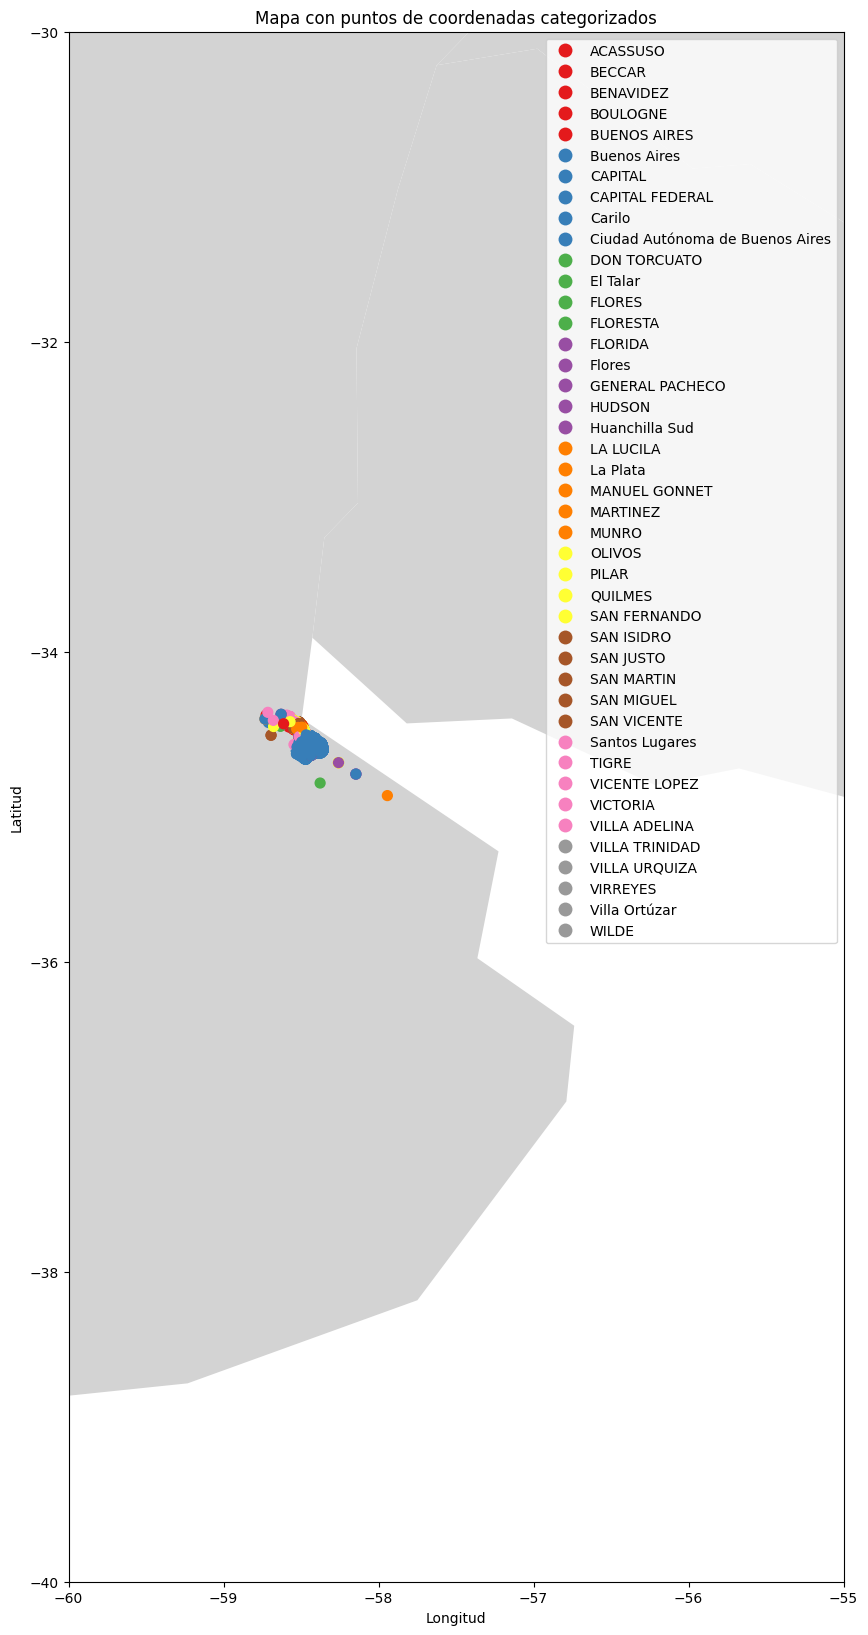

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

df_mapa = df_1[['localidad','latitud','longitud']].copy()
df_mapa = df_1[df_1['localidad'].isin(localidades)]
# Crear un DataFrame de ejemplo
# Convertir el DataFrame a un GeoDataFrame
gdf = gpd.GeoDataFrame(df_mapa, geometry=gpd.points_from_xy(df_mapa.longitud, df_mapa.latitud))

# Descargar un mapa base (opcional, pero recomendado para contexto geográfico)
world = gpd.read_file('./mapa/ne_110m_admin_0_countries.shp')

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 40))

# Ploteamos el mapa base
world.plot(ax=ax, color='lightgray')

# Ploteamos los puntos, diferenciados por categoría con colores
gdf.plot(ax=ax, column='localidad', legend=True, cmap='Set1', markersize=50)

# Limitar el área mostrada (ajustar según la región de interés)
# ax.set_xlim([df_mapa['longitud'].max(), df_mapa['longitud'].min()])  # Limitar el eje X (longitud) a la zona de Buenos Aires
# ax.set_ylim([df_mapa['latitud'].max(), df_mapa['latitud'].min()]) # Limitar el eje Y (latitud) a la zona de Buenos Aires
ax.set_xlim(-60,-55)  # Limitar el eje X (longitud) a la zona de Buenos Aires
ax.set_ylim(-40,-30)
# Mostrar el gráfico
plt.title('Mapa con puntos de coordenadas categorizados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [28]:
# parece que las localidades asignadas por coordenadas no estan tan bien puestos
# podemos usar KNN para tratar de estimar mejor las localidades en base a las que estan mas cerca
# todo depende 

In [29]:
df_1[df_1['localidad']=='BUENOS AIRES'].shape

(34, 17)

In [30]:
df_1[df_1['localidad']=='Buenos Aires'].shape

(12, 17)

In [31]:
df_1[df_1['localidad']=='Ciudad Autónoma de Buenos Aires'].shape

(8, 17)

In [32]:
df_1.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal,coordinates
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000,"(-34.56,-58.46)"
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000,"(-34.56,-58.46)"
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000,"(-34.56,-58.46)"
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000,"(-34.56,-58.46)"
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000,"(-34.56,-58.46)"


In [33]:
df_2 = df_1.copy()
df_2['VisitaPlanificado'] = df_2['InicioVisitaPlanificado']
df_2 = df_2.drop(columns=['InicioVisitaPlanificado','FinVisitaPlanificado']).copy()

import datetime as dt
df_2['VisitaPlanificadoFecha'] = pd.to_datetime(df_2['VisitaPlanificado']).dt.date
df_2['VisitaPlanificadoHora'] = pd.to_datetime(df_2['VisitaPlanificado']).dt.time
df_2['InicioVisitaFecha'] = pd.to_datetime(df_2['InicioVisitaReal']).dt.date
df_2['InicioVisitaHora'] = pd.to_datetime(df_2['InicioVisitaReal']).dt.time
df_2['FinVisitaFecha'] = pd.to_datetime(df_2['FinVisitaReal']).dt.date
df_2['FinVisitaHora'] = pd.to_datetime(df_2['FinVisitaReal']).dt.time

In [34]:
df_3 = df_2.drop(columns=['VisitaPlanificado'])
df_3.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,Unidades,InicioVisitaReal,FinVisitaReal,coordinates,VisitaPlanificadoFecha,VisitaPlanificadoHora,InicioVisitaFecha,InicioVisitaHora,FinVisitaFecha,FinVisitaHora
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,30,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000,"(-34.56,-58.46)",2024-05-23,12:06:00,2024-05-23,14:13:53,2024-05-23,14:14:53
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,38,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000,"(-34.56,-58.46)",2024-05-10,12:05:00,2024-05-10,16:43:00,2024-05-10,16:43:00
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,32,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000,"(-34.56,-58.46)",2024-05-30,12:03:00,2024-05-30,09:41:36,2024-05-30,09:50:08
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,28,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000,"(-34.56,-58.46)",2024-06-13,12:14:00,2024-06-13,13:32:55,2024-06-13,13:39:55
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,31,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000,"(-34.56,-58.46)",2024-06-27,12:27:00,2024-06-27,15:36:00,2024-06-27,15:36:00


In [35]:
df_3['FinVisitaReal']    = pd.to_datetime(df_3['FinVisitaReal'])#,    format='%H:%M:%S')
df_3['InicioVisitaReal'] = pd.to_datetime(df_3['InicioVisitaReal'])#, format='%H:%M:%S')
df_3['DemoraVisitaSegundos'] = (df_3['FinVisitaReal'] - df_3['InicioVisitaReal']).dt.total_seconds()#.astype(int)
df_3.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,InicioVisitaReal,FinVisitaReal,coordinates,VisitaPlanificadoFecha,VisitaPlanificadoHora,InicioVisitaFecha,InicioVisitaHora,FinVisitaFecha,FinVisitaHora,DemoraVisitaSegundos
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,2024-05-23 14:13:53,2024-05-23 14:14:53,"(-34.56,-58.46)",2024-05-23,12:06:00,2024-05-23,14:13:53,2024-05-23,14:14:53,60.0
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,2024-05-10 16:43:00,2024-05-10 16:43:00,"(-34.56,-58.46)",2024-05-10,12:05:00,2024-05-10,16:43:00,2024-05-10,16:43:00,0.0
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,2024-05-30 09:41:36,2024-05-30 09:50:08,"(-34.56,-58.46)",2024-05-30,12:03:00,2024-05-30,09:41:36,2024-05-30,09:50:08,512.0
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,2024-06-13 13:32:55,2024-06-13 13:39:55,"(-34.56,-58.46)",2024-06-13,12:14:00,2024-06-13,13:32:55,2024-06-13,13:39:55,420.0
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,2024-06-27 15:36:00,2024-06-27 15:36:00,"(-34.56,-58.46)",2024-06-27,12:27:00,2024-06-27,15:36:00,2024-06-27,15:36:00,0.0


In [36]:
df_3.sort_values(by='DemoraVisitaSegundos', ascending = False)

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,InicioVisitaReal,FinVisitaReal,coordinates,VisitaPlanificadoFecha,VisitaPlanificadoHora,InicioVisitaFecha,InicioVisitaHora,FinVisitaFecha,FinVisitaHora,DemoraVisitaSegundos
27219,180044,MALABIA 2385,CAPITAL FEDERAL,901,1401,-34.585446,-58.418688,20,6,154.000000,...,2024-06-24 09:24:06,2024-06-24 15:55:10,"(-34.59,-58.42)",2024-06-24,12:01:00,2024-06-24,09:24:06,2024-06-24,15:55:10,23464.0
1195,75258,SANN LUIS 2626,CAPITAL FEDERAL,901,1401,-34.600043,-58.403514,20,5,23.000000,...,2024-05-21 10:21:00,2024-05-21 16:40:19,"(-34.60,-58.40)",2024-05-21,12:53:00,2024-05-21,10:21:00,2024-05-21,16:40:19,22759.0
10188,79524,ALMAFUERTE 457,CAPITAL,901,1401,-34.643499,-58.413552,70,7,4.350000,...,2024-07-23 10:51:08,2024-07-23 15:50:45,"(-34.64,-58.41)",2024-07-23,12:21:00,2024-07-23,10:51:08,2024-07-23,15:50:45,17977.0
21407,128824,ALMAFUERTE 527,CAPITAL,901,1401,-34.643999,-58.413780,70,7,10.000000,...,2024-07-23 10:51:08,2024-07-23 15:50:45,"(-34.64,-58.41)",2024-07-23,12:20:00,2024-07-23,10:51:08,2024-07-23,15:50:45,17977.0
21408,128824,ALMAFUERTE 527,CAPITAL,901,1401,-34.643999,-58.413780,70,7,5.416667,...,2024-07-23 10:51:08,2024-07-23 15:50:45,"(-34.64,-58.41)",2024-07-23,12:20:00,2024-07-23,10:51:08,2024-07-23,15:50:45,17977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27091,179546,JUANA AZURDUY 3698,CAPITAL FEDERAL,901,1401,-34.557242,-58.478112,20,6,2.000000,...,NaT,NaT,"(-34.56,-58.48)",2024-06-10,12:02:00,NaT,NaT,NaT,NaT,NaN
27092,179546,JUANA AZURDUY 3698,CAPITAL FEDERAL,901,1401,-34.557242,-58.478112,20,6,1.000000,...,NaT,NaT,"(-34.56,-58.48)",2024-06-10,12:02:00,NaT,NaT,NaT,NaT,NaN
27135,179623,CALIFORNIA 2000,CAPITAL FEDERAL,901,1401,-34.647600,-58.376333,20,6,29.000000,...,NaT,NaT,"(-34.65,-58.38)",2024-06-12,13:24:00,NaT,NaT,NaT,NaT,NaN
27373,182178,PERGAMINO 3830,Flores,901,1401,-34.668499,-58.435005,20,7,4.000000,...,NaT,NaT,"(-34.67,-58.44)",2024-07-19,12:54:00,NaT,NaT,NaT,NaT,NaN


In [37]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# 1. Cargar el archivo GeoJSON de los partidos de Buenos Aires
partidos_geojson = gpd.read_file("./limites-partidos/partidos.geojson")

# Convertir las coordenadas a geometrías de puntos
geometry = [Point(xy) for xy in zip(df_3['longitud'], df_3['latitud'])]
gdf_puntos = gpd.GeoDataFrame(df_3, geometry=geometry)

# 3. Asegúrate de que ambos GeoDataFrames estén en el mismo sistema de coordenadas (CRS)
gdf_puntos = gdf_puntos.set_crs(partidos_geojson.crs, allow_override=True)

# 4. Hacer un spatial join para asignar el partido a cada punto
gdf_joined = gpd.sjoin_nearest(gdf_puntos, partidos_geojson, how="left")
gdf_joined

c:\Python310\lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,geometry,index_right,cca,cde,fna,gna,nam,sag,ara3,arl
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,POINT (-58.45996 -34.56478),25.0,110,06861,Partido de Vicente López,Partido,Vicente López,ARBA,35.45,33.77
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,POINT (-58.45996 -34.56478),25.0,110,06861,Partido de Vicente López,Partido,Vicente López,ARBA,35.45,33.77
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,POINT (-58.45996 -34.56478),25.0,110,06861,Partido de Vicente López,Partido,Vicente López,ARBA,35.45,33.77
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,POINT (-58.45996 -34.56478),25.0,110,06861,Partido de Vicente López,Partido,Vicente López,ARBA,35.45,33.77
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,POINT (-58.45996 -34.56478),25.0,110,06861,Partido de Vicente López,Partido,Vicente López,ARBA,35.45,33.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27479,183140,CASTILLO 767,CAPITAL FEDERAL,901,1401,NaN,NaN,20,7,2.000000,...,POINT EMPTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27480,183141,ARENALES 2699,CAPITAL FEDERAL,901,1401,-34.592476,-58.404052,20,7,2.000000,...,POINT (-58.40405 -34.59248),24.0,004,06035,Partido de Avellaneda,Partido,Avellaneda,ARBA,57.27,52.48
27481,183274,OLAZABAL 2572,CAPITAL,901,1401,-34.561181,-58.459866,70,7,2.150000,...,POINT (-58.45987 -34.56118),25.0,110,06861,Partido de Vicente López,Partido,Vicente López,ARBA,35.45,33.77
27482,183276,GUAMINI 2121,CAPITAL FEDERAL,901,1401,-34.661128,-58.511529,20,7,3.000000,...,POINT (-58.51153 -34.66113),2.0,070,06427,Partido de La Matanza,Partido,La Matanza,ARBA,328.19,329.22


In [38]:
df_3.localidad.unique()

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO', 'FLORESTA',
       'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

In [39]:
gdf_joined[['localidad','fna']].drop_duplicates().head(20)

,localidad,fna
0,CAPITAL,Partido de Vicente López
15,CAPITAL,Partido de Tres de Febrero
15,CAPITAL,Partido de General San Martín
67,CAPITAL FEDERAL,Partido de La Matanza
100,CAPITAL FEDERAL,Partido de Tres de Febrero
100,CAPITAL FEDERAL,Partido de General San Martín
115,CAPITAL,Partido de La Matanza
209,VILLA URQUIZA,Partido de Vicente López
229,VILLA URQUIZA,Partido de General San Martín
352,FLORES,Partido de Lanús


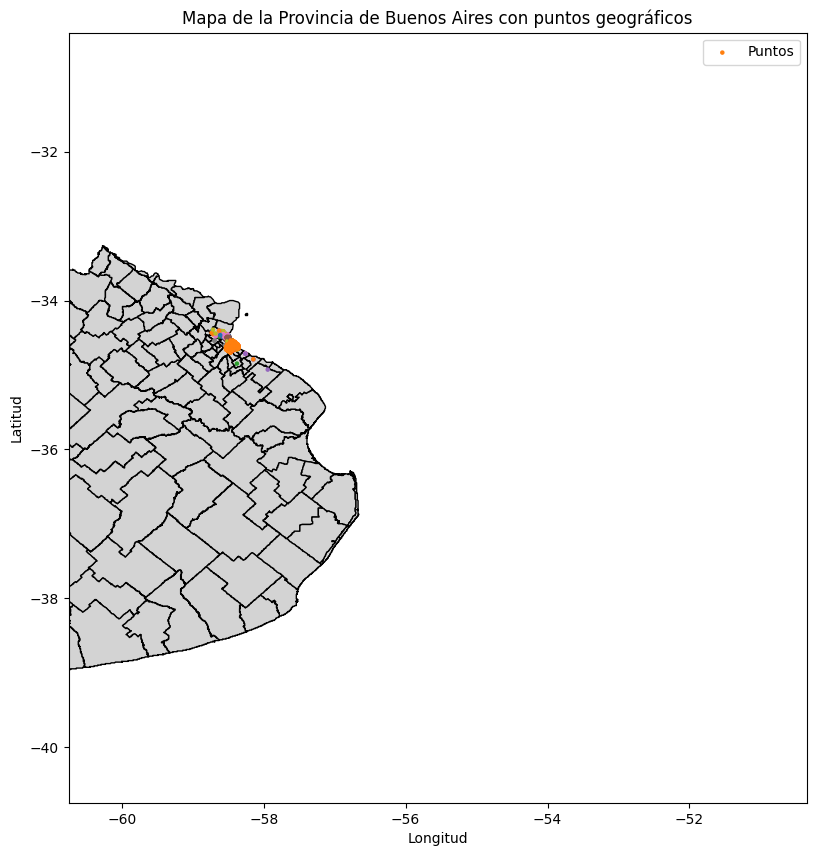

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los partidos de la provincia de Buenos Aires
partidos_geojson.plot(ax=ax, color='lightgray', edgecolor='black')

# Graficar los puntos (coordenadas) sobre los partidos
gdf_puntos.plot(ax=ax, column='localidad', marker='o', markersize=5, label='Puntos')
# gdf_puntos[gdf_puntos['localidad'].isin(['CAPITAL','CAPITAL FEDERAL','BUENOS AIRES','Buenos Aires','Ciudad Autónoma de Buenos Aires'])].plot(ax=ax, column='localidad', marker='o', markersize=5, legend=True)
# gdf.plot(ax=ax, column='localidad', legend=True, cmap='Set1', markersize=50)

plt.xlim(-60.75,-50.35)
plt.ylim(-40.75,-30.4)
# Añadir etiquetas, leyenda y título
plt.legend()
plt.title('Mapa de la Provincia de Buenos Aires con puntos geográficos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el gráfico
plt.show()

In [65]:
df.localidad.unique()

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'SIN LOCALIDAD', 'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO',
       'FLORESTA', 'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

In [52]:
gdf_joined.localidad.unique().tolist()

['CAPITAL',
 'CAPITAL FEDERAL',
 'VILLA URQUIZA',
 'FLORES',
 'Villa Ortúzar',
 'SAN FERNANDO',
 'VICTORIA',
 'BECCAR',
 'SAN ISIDRO',
 'TIGRE',
 'VIRREYES',
 'MARTINEZ',
 'BUENOS AIRES',
 'VICENTE LOPEZ',
 'OLIVOS',
 'FLORIDA',
 'MUNRO',
 'FLORESTA',
 'BOULOGNE',
 'ACASSUSO',
 'LA LUCILA',
 'VILLA TRINIDAD',
 'VILLA ADELINA',
 'BENAVIDEZ',
 'La Plata',
 'Huanchilla Sud',
 'GENERAL PACHECO',
 'El Talar',
 'Buenos Aires',
 'SAN MIGUEL',
 'QUILMES',
 'SAN MARTIN',
 'DON TORCUATO',
 'SAN JUSTO',
 'Carilo',
 'Ciudad Autónoma de Buenos Aires',
 'Santos Lugares',
 'MANUEL GONNET',
 'PILAR',
 'SAN VICENTE',
 'Flores',
 'HUDSON',
 'WILDE']

## TESTEO DE MAPA INTERACTIVO

In [47]:
import folium
from folium.plugins import HeatMap

In [54]:
df = df.dropna(subset=['latitud', 'longitud'])

# Agrupar por localidad y calcular la cantidad total de repartos y las coordenadas promedio
repartos_por_localidad = df.groupby('localidad').agg({
    'latitud': 'mean',
    'longitud': 'mean',
    'localidad': 'size'
}).rename(columns={'localidad': 'cantidad_repartos'}).reset_index()

# Crear el mapa centrado en Buenos Aires
m = folium.Map(location=[-34.603722, -58.381592], zoom_start=12)

# Añadir un círculo por localidad con información de repartos
for i, row in repartos_por_localidad.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=np.log(row['cantidad_repartos']) * 5,  # Ajustar el tamaño del círculo
        popup=f"Localidad: {row['localidad']}<br>Cantidad de repartos: {row['cantidad_repartos']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Añadir un HeatMap basado en las coordenadas promedio de cada localidad
heat_data = [[row['latitud'], row['longitud'], row['cantidad_repartos']] for index, row in repartos_por_localidad.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa en un archivo HTML
m.save("heatmap_por_localidad_buenos_aires.html")

# Mostrar el mapa (si estás en Jupyter Notebook)
m